# Entrega 2 - Implementación de Modelos

En la segunda entrega, el objetivo es que los participantes desarrollen habilidades en la construcción de modelos predictivos. Se trabajarán los modelos de regresión y clasificación, permitiendo a los participantes comprender y aplicar estos algoritmos para resolver problemas específicos.

**ACLARACIÓN: DEBEN SELECCIONAR UN MODELO PARA TRABAJAR CON EL DATASET DE CLASIFICACIÓN Y OTRO MODELO PARA TRABAJAR CON EL DATASET DE REGRESIÓN. UTILIZAR UN ARCHIVO DE GOOGLE COLAB DIFERENTE POR CADA APLICACIÓN DE MODELO.**

## Profesores

*   Dr. Ierache, Jorge
*   Dr. Becerra Martín
*   Ing. Sanz Diego

## Alumnos

* Rodríguez, Emanuel Antonio
* Romano, Jorge Darío
* Sandoval Vasquez, Juan Leandro
* Sierra, Nicolas Federico

## Actividades

### Aplicación de Modelo de Regresión

* Seleccionar una variable objetivo y las variables predictoras adecuadas para el modelado de regresión.
* Dividir el conjunto de datos en conjuntos de entrenamiento y prueba.
* Aplicar un modelo de regresión, como regresión lineal o regresión logística.
* Evaluar el rendimiento del modelo utilizando métricas apropiadas, como el error cuadrático medio o la precisión del modelo.
* Ajustar y optimizar los parámetros del modelo para mejorar su rendimiento.

### Aplicación de Modelo de Clasificación

* Seleccionar una variable objetivo y las variables predictoras adecuadas para el modelado de clasificación.
* Aplicar un modelo de clasificación, como árboles de decisión, SVM o Random Forest.
* Evaluar el rendimiento del modelo utilizando métricas apropiadas.
* Ajustar y optimizar los parámetros del modelo para mejorar su rendimiento.

## Procesos

### Importaciones de librerías

In [948]:
# Carga y manipulación de datos
import numpy as np
import pandas as pd

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Configuración visual
sns.set_theme(style="whitegrid")
%matplotlib inline

### 1 - Análisis exploratorio de datos



* Recopilar y examinar el conjunto de datos proporcionado.
* Identificar las características clave de los datos, como variables numéricas, categóricas, etc.
* Identificar posibles problemas en los datos, como valores atípicos o datos faltantes.
*	Realizar una limpieza inicial de los datos, si es necesario.
*	Trabajar sobre variables categóricas.


#### a) Cargamos el dataset en un dataframe
* La recopilación de los datos se obtuvieron del Sitio: **Kaggle** -
Link de Datos: [FIFA 2021 Complete Player Dataset](https://www.kaggle.com/datasets/aayushmishra1512/fifa-2021-complete-player-data).
* A continuación se realiza una muestra parcial del contenido de datos:

In [949]:
PATH_DATASET = 'FIFA21Complete.csv'
SEPARADOR = ";"
df = pd.read_csv(PATH_DATASET, sep = SEPARADOR)
df.head()

,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid


#### b) Información general del dataset

In [950]:
df.describe()

,player_id,overall,age,hits,potential
count,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000
mean,220912.660531,67.274345,26.311440,2.689450,71.738057
std,27738.072671,5.924392,4.556077,10.846286,5.961968
min,41.000000,56.000000,17.000000,0.000000,57.000000
25%,204881.000000,63.000000,23.000000,0.000000,67.000000
50%,226753.000000,67.000000,26.000000,0.000000,71.000000
75%,241587.000000,71.000000,30.000000,2.000000,76.000000
max,256469.000000,94.000000,43.000000,371.000000,95.000000


#### c) Visualización de la cantidad de filas y columnas

In [951]:
df.shape

(17981, 9)

El dataset cuenta con:
*   17.981 registros (Cantidad de jugadores de futbol)
*   9 columnas con informacion descriptiva de cada uno de los jugadores



#### d) Nombre de las columnas

In [952]:
df.columns

Index(['player_id', 'name', 'nationality', 'position', 'overall', 'age',
       'hits', 'potential', 'team'],
      dtype='object')

La informacion que se posee del jugador es la siguiente:


* Id del Jugador
* Nombre
* Nacionalidad
* Posición
* Overall (Valoración global)
* Edad
* Hits (Cantidad de veces que ha sido buscado / consultado)
* Potential (Potencial futuro)
* Equipo



#### e) Tipos de datos

In [953]:
df.dtypes

player_id       int64
name           object
nationality    object
position       object
overall         int64
age             int64
hits            int64
potential       int64
team           object
dtype: object

Vemos que las columnas `player_id`, `overall`, `age`, `hits` y `potential` son variables numericas.

Las columnas `name`, `nationality`, `position` y `team` son de tipo de dato objeto.

**A futuro, habra que realizar un encoding para mapear los valores de estas variables a valores numericos para poder utilizar algunos modelos (O tomar alguna otra decision).**

#### f) Limpieza inicial de datos

Como vemos, las columnas `player_id` y `name` no son del todo utiles para el analisis de datos ya que son valores unicos (o muy pocos para el caso de nombre).

Por otro lado, la columna  `team` (que representa el club en el que se encontraba actualmente a la fecha que se creo este dataset) no tiene mucho sentido ya que seran mas o menos 22 jugadores (entre titulares y suplentes por cada equipo).

Un caso posible por que el nos convendria quedarnos con esta columna es que determinemos de que Nacionalidad hay mas jugadores en cierto club, pero como no es objeto de estudio, se tomo la decision de eliminarla.

Es por esto que decidimos eliminarlas de nuestro set de datos y asi evitamos "fugas de datos" o ruido innecesario.

In [954]:
df = df.drop(['player_id', 'name', 'team'], axis=1)

#### g) Tratamiento de variables categoricas

Como vimos en el item e) las columnas `name` **(ya eliminada)**, `nationality`, `position` y `team` **(ya eliminada)** son de tipo de dato objeto.

##### Tratamiento de la variable `position`

Determinamos todas las posiciones de los jugadores que se encuentran en nuestro DataFrame

In [955]:
pos_split = df['position'].str.split('|')
todas_pos = pos_split.explode().unique()
print("Posiciones únicas en el dataset:", todas_pos)

Posiciones únicas en el dataset: ['ST' 'CF' 'RW' 'LW' 'CAM' 'CB' 'GK' 'CM' 'CDM' 'LM' 'RB' 'RM' 'LB' 'LWB'
 'RWB']


Creamos las columnas binarias (multi-hot) de forma manual. Esto se realiza ya que en un registro de nuestro dataset, la posicion del jugador se encontraba de la forma ST|CF|RW y es por esto que con tecnimas como dummies no era posible su utilización.

Por lo tanto, creamos una columna para cada posicion, si ese jugador aparece en dicha posicion, se le asignara un uno (1), caso contrario, un cero (0)

In [956]:
for pos in todas_pos:
    df[f'pos_{pos}'] = df['position'].apply(lambda s: int(pos in s.split('|')))

Y eliminamos la columna original

In [957]:
df = df.drop(['position'], axis=1)

##### Tratamiento de la variable `nationality`

Este tratamiento se realizara en la seccion **3 - Datos Faltantes**, no se realiza aca ya que es necesario su analisis grafico en la seccion **2 - Visualizacion de Datos** para determinar una decisión.

#### Resultado parcial

Para finalizar, mostramos como quedo nuestro dataset hasta ahora

In [958]:
df

,nationality,overall,age,hits,potential,pos_ST,pos_CF,pos_RW,pos_LW,pos_CAM,pos_CB,pos_GK,pos_CM,pos_CDM,pos_LM,pos_RB,pos_RM,pos_LB,pos_LWB,pos_RWB
0,Argentina,94,33,299,94,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Portugal,93,35,276,93,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Brazil,92,28,186,92,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
3,Netherlands,91,29,127,92,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,Slovenia,91,27,47,93,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,Ecuador,56,21,0,64,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17977,Ecuador,56,23,0,64,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
17978,Venezuela,56,18,1,68,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17979,Venezuela,56,22,0,62,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


En cuanto a los **valores atipicos**, **duplicados** o **verificacion de nulos** se llevaran a cabo en las siguientes etapas.

### 2 - Visualización de Datos

* Seleccionar las variables relevantes para visualizar.
* Utilizar gráficos adecuados para representar diferentes tipos de variables, como histogramas, diagramas de dispersión, diagramas de caja, etc.
* Explorar la relación entre diferentes variables mediante gráficos de dispersión o gráficos de correlación.
* Realizar análisis visual para identificar patrones o tendencias en los datos.


#### a) Análisis columna **`nationality`**

##### Cantidad de frecuencias de nacionalidades

Vemos la cantidad de apariciones de cada pais por Nacionalidad

In [959]:
COLUMNA_NACIONALIDAD = 'nationality'
frecuencias_nacionalidad = df[COLUMNA_NACIONALIDAD].value_counts()
print(frecuencias_nacionalidad)

nationality
England      1496
Germany      1138
Spain        1055
Argentina     970
France        948
             ... 
Ethiopia        1
Gibraltar       1
Macau           1
Barbados        1
Nicaragua       1
Name: count, Length: 162, dtype: int64


##### Countplot general

Con este grafico de barras podemos ver cuantos jugadores se encuentran en diferentes paises.

Como la cantidad de paises son demasiadas para este grafico, solo listaremos los 10 paises mas relevantes.

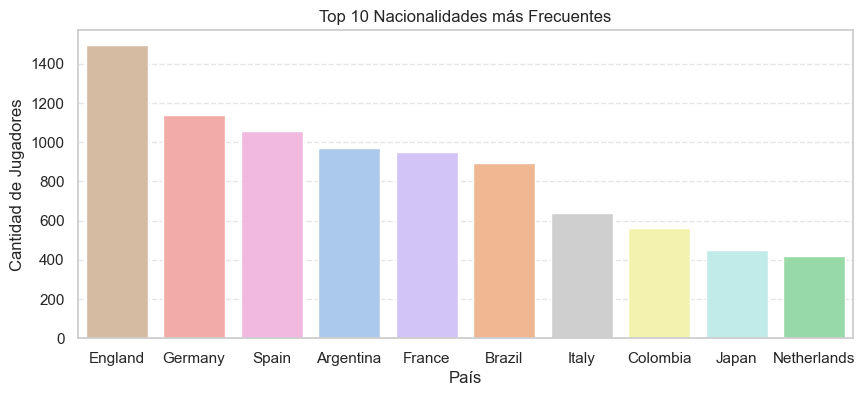

In [960]:
top10_nacionalidades = df[COLUMNA_NACIONALIDAD].value_counts().nlargest(10).index.tolist()
df_top10_nacionalidades = df[df[COLUMNA_NACIONALIDAD].isin(top10_nacionalidades)]

plt.figure(figsize=(10,4))
sns.countplot(
    x=COLUMNA_NACIONALIDAD,
    hue=COLUMNA_NACIONALIDAD,
    data=df_top10_nacionalidades,
    palette='pastel',
    order=top10_nacionalidades
)

plt.title('Top 10 Nacionalidades más Frecuentes')
plt.xlabel('País')
plt.ylabel('Cantidad de Jugadores')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#### b) Análisis columna **`age`**

##### Cantidad de frecuencias de nacionalidades

In [961]:
COLUMNA_EDAD = 'age'
frecuencias_edades = df[COLUMNA_EDAD].value_counts()
print(frecuencias_edades)

age
24    1436
23    1376
28    1360
26    1330
27    1303
25    1294
22    1289
21    1172
29    1146
30    1031
20     974
31     880
32     764
33     601
19     515
34     453
35     298
18     223
36     214
37     128
38      75
17      45
39      41
40      18
41       9
42       4
43       2
Name: count, dtype: int64


##### Countplot general

Con este gráfico de barras podemos visualizar que edad seria en la que un jugador profesional deberia tener.

Como la cantidad de edad son demasiadas para este grafico, solo listaremos las 10 edades mas relevantes.

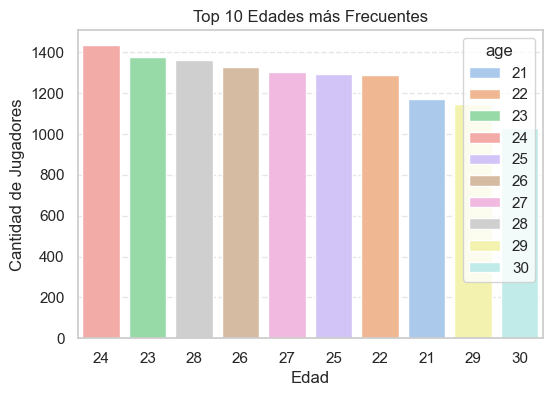

In [962]:
top10_edades = df[COLUMNA_EDAD].value_counts().nlargest(10).index.tolist()
df_top10_edades = df[df[COLUMNA_EDAD].isin(top10_edades)]

plt.figure(figsize=(6,4))
sns.countplot(
    x=COLUMNA_EDAD,
    hue=COLUMNA_EDAD,
    data=df_top10_edades,
    palette='pastel',
    order=top10_edades
)

plt.title('Top 10 Edades más Frecuentes')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Jugadores')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

##### Boxplot general de la variable predictora Edad

Mediante este grafico podemos detectar los posibles outliers.

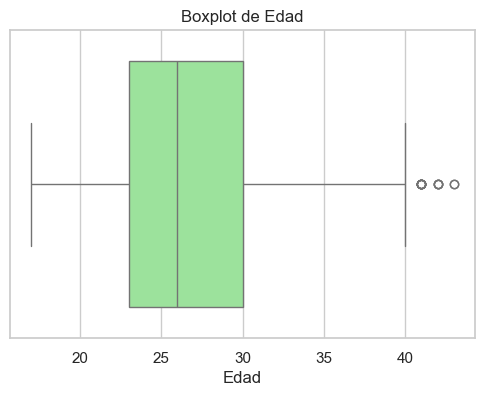

In [963]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df[COLUMNA_EDAD], color='lightgreen')
plt.title('Boxplot de Edad')
plt.xlabel('Edad')
plt.show()

In [964]:
Q1 = df[COLUMNA_EDAD].quantile(0.25)
Q3 = df[COLUMNA_EDAD].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df[COLUMNA_EDAD] < limite_inferior) | (df[COLUMNA_EDAD] > limite_superior)]

print(f'Cantidad de outliers en Edad: {len(outliers)}')

Cantidad de outliers en Edad: 15


##### Histograma (KDE) de la distribucion completa de edad

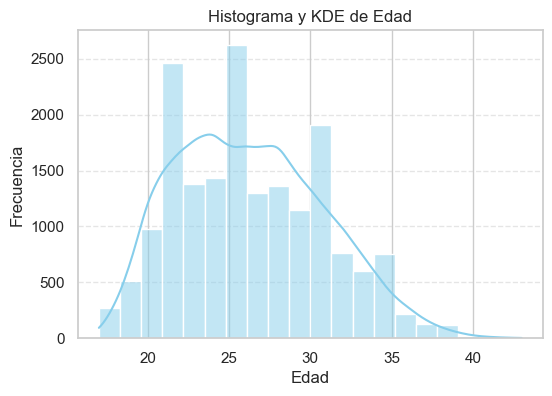

In [965]:
plt.figure(figsize=(6,4))
sns.histplot(df[COLUMNA_EDAD], bins=20, kde=True, color='skyblue')
plt.title('Histograma y KDE de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Con esto podremos ver de forma cuantitativa cuantos jugadores hay en cada rango de edad y ademas determinar si la variable es normal, sesgada a la derecha/izquierda o multimodal.

#### b) Análisis columna **`overall`**

##### Cantidad de frecuencias de overall

In [966]:
COLUMNA_OVERALL = 'overall'
frecuencias_overall = df[COLUMNA_OVERALL].value_counts()
print(frecuencias_overall)

overall
66    1236
65    1229
67    1215
64    1178
68    1139
63    1062
69     972
70     954
62     905
71     822
72     820
60     769
61     743
73     630
74     589
59     583
58     512
75     501
57     469
76     363
77     288
78     252
79     180
80     141
81     100
82      88
83      67
84      41
85      34
86      26
87      20
56      18
88      13
89       9
90       5
91       5
93       1
92       1
94       1
Name: count, dtype: int64


##### Countplot general

Con este gráfico de barras podemos visualizar que overall tiene un jugador profesional.

Como la cantidad de overalls son demasiadas para este grafico, solo listaremos los 10 overall mas relevantes.

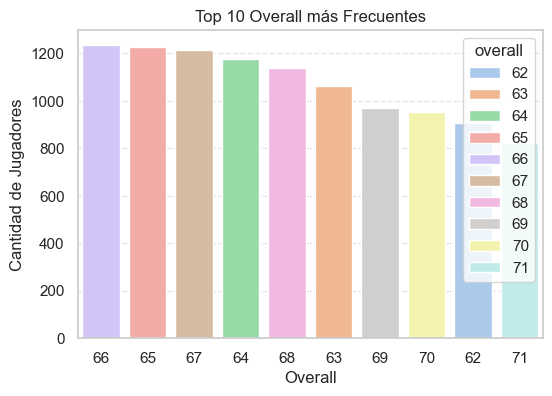

In [967]:
top10_overall = df[COLUMNA_OVERALL].value_counts().nlargest(10).index.tolist()
df_top10_overall = df[df[COLUMNA_OVERALL].isin(top10_overall)]

plt.figure(figsize=(6,4))
sns.countplot(
    x=COLUMNA_OVERALL,
    hue=COLUMNA_OVERALL,
    data=df_top10_overall,
    palette='pastel',
    order=top10_overall
)

plt.title('Top 10 Overall más Frecuentes')
plt.xlabel('Overall')
plt.ylabel('Cantidad de Jugadores')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

##### Boxplot general de la variable Overall

Mediante este grafico podemos detectar los posibles outliers.

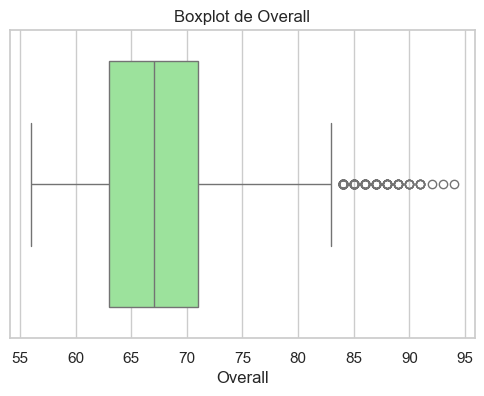

In [968]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df[COLUMNA_OVERALL], color='lightgreen')
plt.title('Boxplot de Overall')
plt.xlabel('Overall')
plt.show()

In [969]:
Q1 = df[COLUMNA_OVERALL].quantile(0.25)
Q3 = df[COLUMNA_OVERALL].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df[COLUMNA_OVERALL] < limite_inferior) | (df[COLUMNA_OVERALL] > limite_superior)]

print(f'Cantidad de outliers en Overall: {len(outliers)}')

Cantidad de outliers en Overall: 156


##### Histograma (KDE) de la distribucion completa de overall

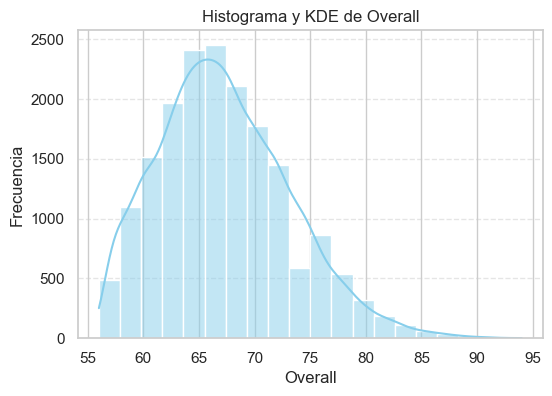

In [970]:
plt.figure(figsize=(6,4))
sns.histplot(df[COLUMNA_OVERALL], bins=20, kde=True, color='skyblue')
plt.title('Histograma y KDE de Overall')
plt.xlabel('Overall')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Con esto podremos ver de forma cuantitativa cuantos jugadores se encuentra en determinado overall y ademas determinar si la variable es normal, sesgada a la derecha/izquierda o multimodal.

##### Matriz de Correlación

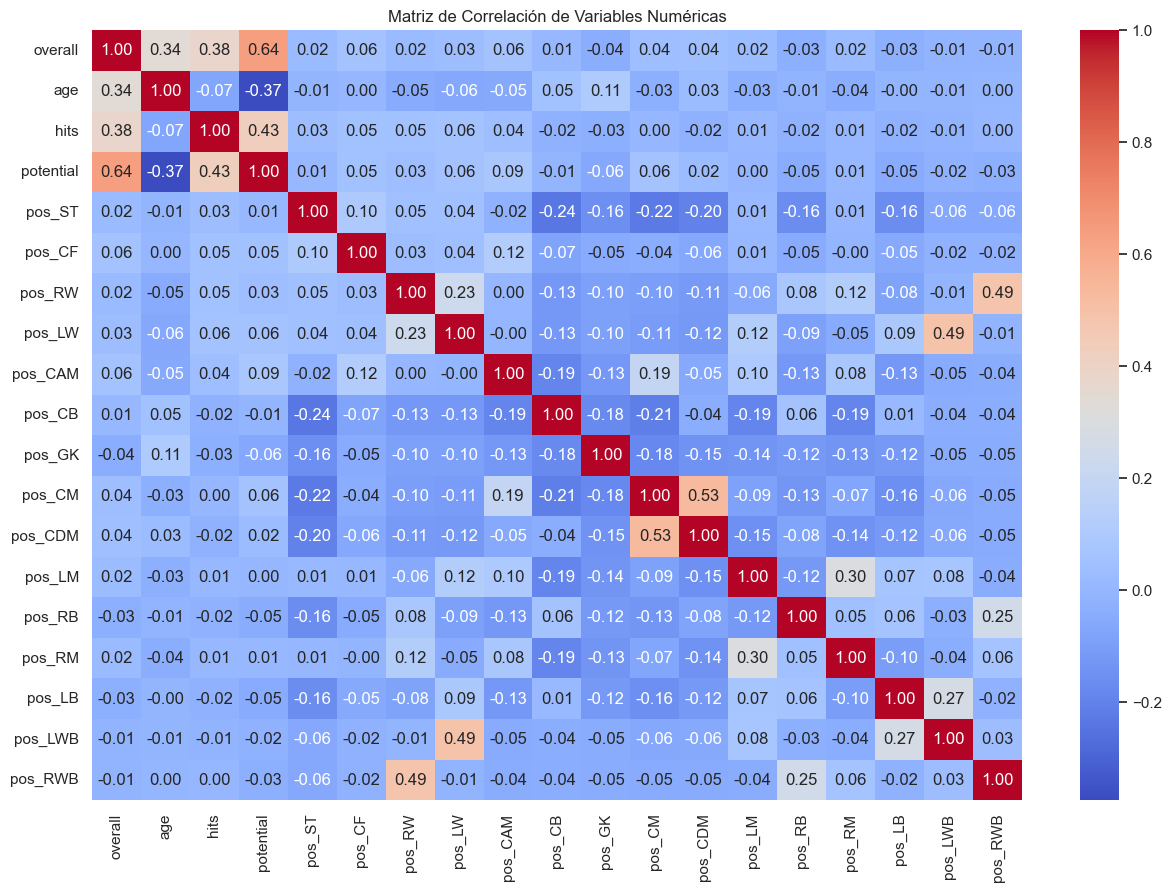

In [971]:
numericas = df.select_dtypes(include='number').columns.tolist()

corr = df[numericas].corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

### 3 - Datos faltantes y/o Valores Atípicos (Outliers)

*	Identificar y evaluar la cantidad de datos faltantes (y/o Valores Atípicos (Outliers)) en el conjunto de datos.
*	Determinar la estrategia para manejar los datos faltantes, como el imputado de valores o la eliminación de filas o columnas con datos faltantes.
*	Aplicar la estrategia elegida para completar o eliminar los datos faltantes.
*	Validar y verificar la integridad de los datos después del tratamiento de datos faltantes.


#### a) Verificación de datos faltantes / valores nulos

In [972]:
df.isna().sum()/df.shape[0]*100

nationality    0.0
overall        0.0
age            0.0
hits           0.0
potential      0.0
pos_ST         0.0
pos_CF         0.0
pos_RW         0.0
pos_LW         0.0
pos_CAM        0.0
pos_CB         0.0
pos_GK         0.0
pos_CM         0.0
pos_CDM        0.0
pos_LM         0.0
pos_RB         0.0
pos_RM         0.0
pos_LB         0.0
pos_LWB        0.0
pos_RWB        0.0
dtype: float64

Podemos observar que **ninguna de las variables tienen valores nulos**, por lo que no habra que realizar imputaciones de este tipo.

#### b) Verificación de valores duplicados

In [973]:
df.duplicated().sum()

np.int64(223)

El dataset no cuenta con registros duplicados

#### c) Eliminacion de filas o columnas

Para el caso de eliminacion de filas / columnas se realizo el Paso 1 - Limpieza de Datos

##### Tratamiento de la columna **`nationality`**

Como vimos en el grafico, solo vamos a quedarnos con las 10 nacionalidades con mas frecuencias del set de datos, para asi luego tratar esta variable categorica.

A partir del onceavo país imputaremos como valor 'Otro' para reducir la cardinalidad al realizar el tratamiento.

In [974]:
top10_nacionalidades = df[COLUMNA_NACIONALIDAD].value_counts().nlargest(10).index.tolist()

df[COLUMNA_NACIONALIDAD] = df[COLUMNA_NACIONALIDAD].apply(lambda x: x if x in top10_nacionalidades else 'Otro')

print(df[COLUMNA_NACIONALIDAD].value_counts())

df = pd.get_dummies(df, columns=[COLUMNA_NACIONALIDAD], prefix='nac')

nationality
Otro           9416
England        1496
Germany        1138
Spain          1055
Argentina       970
France          948
Brazil          894
Italy           637
Colombia        561
Japan           448
Netherlands     418
Name: count, dtype: int64


#### d) Imputacion de valores outliers

##### Tratamiento de la columna **`age`**

Para el caso de edades, vamos a imputar los valores atipicos por la media.

* Calculamos nuevamente Q1, Q3 e IQR sobre la columna Edad.
* Creamos un booleano que marque los “no outliers” (edad dentro del rango aceptable)
* Y luego calculamos la media de Edad usando únicamente esos valores no atípicos
* Para finalizar, reemplazamos todos los outliers (<limite_inferior o >limite_superior) por esa media.

In [975]:
Q1 = df[COLUMNA_EDAD].quantile(0.25)
Q3 = df[COLUMNA_EDAD].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

mascara_no_outlier = (df[COLUMNA_EDAD] >= limite_inferior) & (df[COLUMNA_EDAD] <= limite_superior)
media_no_atipicos = int(round(df.loc[mascara_no_outlier, COLUMNA_EDAD].mean()))

df.loc[df[COLUMNA_EDAD] <  limite_inferior, COLUMNA_EDAD] = media_no_atipicos
df.loc[df[COLUMNA_EDAD] >  limite_superior, COLUMNA_EDAD] = media_no_atipicos

Verificamos que ya no hay outliers

In [976]:
nuevos_outliers = df[(df[COLUMNA_EDAD] <  (Q1 - 1.5 * IQR)) | (df[COLUMNA_EDAD] >  (Q3 + 1.5 * IQR))]
print(f'Outliers restantes: {len(nuevos_outliers)} (debería ser 0)')

Outliers restantes: 0 (debería ser 0)


#### Resultado parcial

Para finalizar, mostramos como quedo nuestro dataset hasta ahora

In [977]:
df

,overall,age,hits,potential,pos_ST,pos_CF,pos_RW,pos_LW,pos_CAM,pos_CB,...,nac_Brazil,nac_Colombia,nac_England,nac_France,nac_Germany,nac_Italy,nac_Japan,nac_Netherlands,nac_Otro,nac_Spain
0,94,33,299,94,1,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,93,35,276,93,1,0,0,1,0,0,...,False,False,False,False,False,False,False,False,True,False
2,92,28,186,92,0,0,0,1,1,0,...,True,False,False,False,False,False,False,False,False,False
3,91,29,127,92,0,0,0,0,0,1,...,False,False,False,False,False,False,False,True,False,False
4,91,27,47,93,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,56,21,0,64,1,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
17977,56,23,0,64,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
17978,56,18,1,68,1,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
17979,56,22,0,62,0,0,1,0,0,0,...,False,False,False,False,False,False,False,False,True,False


### 4) Aplicación de Modelo de Regresión

* Seleccionar una variable objetivo y las variables predictoras adecuadas para el modelado de regresión.
* Dividir el conjunto de datos en conjuntos de entrenamiento y prueba.
* Aplicar un modelo de regresión, como regresión lineal o regresión logística.
* Evaluar el rendimiento del modelo utilizando métricas apropiadas, como el error cuadrático medio o la precisión del modelo.
* Ajustar y optimizar los parámetros del modelo para mejorar su rendimiento.

#### a) Preprocesamiento de datos

Definimos variables predictoras y target. Como antes realizamos el procesamiento de datos sobre variables categoricas, datos faltantes (nulos), e imputacion de los datos. Podremos utilizar todas las columnas.

In [985]:
X = df.drop(columns=[COLUMNA_OVERALL])
y = df[COLUMNA_OVERALL]

#### b) División en entrenamiento y prueba

In [986]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### c) Normalización de Entrenamiento y Prueba luego del Train-Test Split

In [987]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### d) Entrenamiento del modelo

Aplicamos el modelo de Regresión Lineal

In [988]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

#### e) Evaluación del Modelo

In [989]:
y_pred = lr.predict(X_test_scaled)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.3f}")

MSE:  6.12
RMSE: 2.47
R²:   0.825


Con estos valores determinamos que RMSE es de aproximadamente 2.47, indica que en promedio, la predicción de "overall" se desvía de la realidad en unas 2.5 unidades de rating. Dado que el "overall" va típicamente de 50 a 100, un error de 2.5 puntos es bastante bajo.

Nuestro modelo explica el 82.5% de varianza de overall. Es un rendimiento bueno para un modelo lineal con todas las variales imputadas.

#### f) Coeficientes del Modelo

Estos coeficientes indican como cambia, en promedio y manteniendo fijas las demas variables, la prediccion de overall por cada unidad de cambio en la variable asociada.

In [990]:
coeffs = pd.Series(lr.coef_, index=X.columns)
print(coeffs.sort_values(ascending=False))

potential          5.078456
age                4.004253
nac_Brazil         0.586628
hits               0.337311
pos_LM             0.157031
pos_RM             0.152182
pos_RB             0.094445
pos_ST             0.089693
pos_CM             0.072330
pos_LB             0.069719
pos_RW             0.064540
pos_LW             0.063619
pos_CDM            0.057416
nac_Netherlands    0.039737
pos_CAM            0.034850
pos_RWB            0.028562
pos_CF             0.021621
pos_LWB            0.019216
nac_Japan         -0.003082
nac_Germany       -0.014105
nac_France        -0.016260
pos_CB            -0.024987
nac_Otro          -0.033022
nac_Spain         -0.037148
nac_Italy         -0.039624
nac_Colombia      -0.074650
nac_Argentina     -0.099544
pos_GK            -0.203038
nac_England       -0.213050
dtype: float64


Podemos determinar que `potential` y `age` dominan el modelo. Esto quiere decir que, por cada punto extra de **potential**, el **overall** predicho sube en unos **5 puntos**. Por otro lado, por cada año mas de edad, el **overall** sube en unos **4 puntos**.

Esto explica que la mayor parte de la varianza se capta con estas dos variables: Cuanto mayor sea el potencial y, hasta cierto punto, la edad del jugador, más alto es el "overall" esperado.

#### g) Gráfico: Predicción vs Real

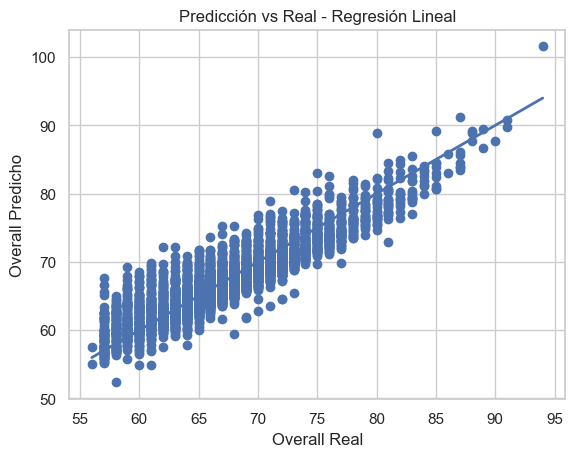

In [991]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linewidth=2)
plt.xlabel('Overall Real')
plt.ylabel('Overall Predicho')
plt.title('Predicción vs Real - Regresión Lineal')
plt.show()

#### h) Conclusión

Podemos observar varios puntos dado este gráfico:

* **Alineación con la diagonal**: La mayoría de los puntos se agrupan muy cerca de la linea y = x, lo que indica que el modelo de regresión lineal está prediciendo con bastante precisión los valores de `overall`.
* **Dispersión en valores altos**: En los ratings por encima de 85-90 se aprecia un poco mas de esparcimiento de los puntos. Ahí el modelo pierde precisión relativa, tal como sugería el ligero aumento de residuales en los extremos.
* **Homogeneidad de los errores**: El "ancho" de la nube de puntos se mantiewne bastante uniforme a lo largo del rango promedio (60 - 85), lo que indica que varianza de error constante.

El ajuste linea captura correctamente la relación entre las variables predictoras y el `overall`, con un error promedio (RMSE) bajo y sin sesgos importantes; solo en los ratings mas altos se aprecia algo más de dispersión, lo que podría mejorarse con un modelo más flexible.